# Step 1: Deciding (not) to segment

McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy

# Step 2: Specifing the ideal target segment

McDonald’s management needs to decide which key features make a market segment attractive to them. In terms of knock-out criteria, the target segment or target segments must be homogeneous (meaning that segment members are similar to one another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s (meaning, for example, that they must be open to eating at fast food restaurants rather than rejecting them outright),
identifiable (meaning that there must be some way of spotting them among other consumers) and, finally, reachable (meaning that channels of communication and
distribution need to exist which make it possible to aim at members of the target segment specifically).
In terms of segment attractiveness criteria, the obvious choice would be a
segment that has a positive perception of McDonald’s, frequently eats out and likes
fast food. 

In [1]:
#let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Step 3: Collecting data

In [2]:
#load the data set from http://www.marketsegmentationanalysis.org/
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

# Step 4: Exploring data

In [3]:
#top 5 rows 
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
#  bottom 5 rows 
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
#the shape of dataset
print(data.shape)

(1453, 15)


In [6]:
#check details 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# unique value
data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [9]:
#insights of the data for all dataset
data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [10]:
#all columns name
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [11]:
#count of missing values.
data.isna().sum()
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## Convert categorical column to numeric

In [12]:
data['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [13]:
data['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [14]:
data['fattening'].value_counts()

Yes    1260
No      193
Name: fattening, dtype: int64

In [15]:
data['greasy'].value_counts()

Yes    765
No     688
Name: greasy, dtype: int64

In [16]:
data['fast'].value_counts()

Yes    1308
No      145
Name: fast, dtype: int64

In [17]:
data['cheap'].value_counts()

Yes    870
No     583
Name: cheap, dtype: int64

In [18]:
data['tasty'].value_counts()

Yes    936
No     517
Name: tasty, dtype: int64

In [19]:
data['expensive'].value_counts()

No     933
Yes    520
Name: expensive, dtype: int64

In [20]:
data['healthy'].value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

In [21]:
data['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

In [22]:
data["yummy"]= data["yummy"].replace({'Yes':1, 'No':0})
data["convenient"] = data["convenient"].replace({'Yes':1, 'No':0})
data["spicy"] = data["spicy"].replace({'Yes':1, 'No':0})
data["fattening"] = data["fattening"].replace({'Yes':1, 'No':0})
data["greasy"] = data["greasy"].replace({'Yes':1, 'No':0})
data["fast"] = data["fast"].replace({'Yes':1, 'No':0})
data["cheap"] = data["cheap"].replace({'Yes':1, 'No':0})
data["tasty"] = data["tasty"].replace({'Yes':1, 'No':0})
data["expensive"] = data["expensive"].replace({'Yes':1, 'No':0})
data["healthy"] = data["healthy"].replace({'Yes':1, 'No':0})
data["disgusting"] = data["disgusting"].replace({'Yes':1, 'No':0})

data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [23]:
data1= data.iloc[:,0:11]

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [25]:
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


## Standardisation

In [26]:
scaled_df = scalar.fit_transform(data1)

## Principal Component Analysis (PCA)

In [27]:
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

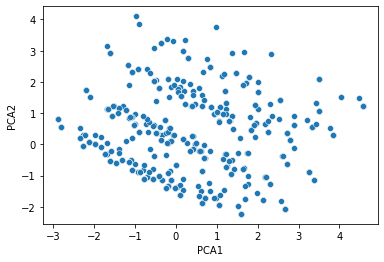

In [28]:
#Visualization of PCA1 and PCA2
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

<AxesSubplot:>

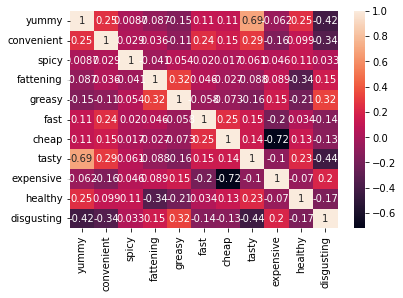

In [29]:
sns.heatmap(data1.corr(), annot=True)

# Step 5: Extracting segments

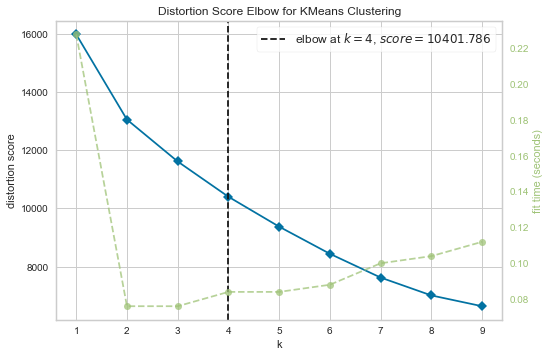

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

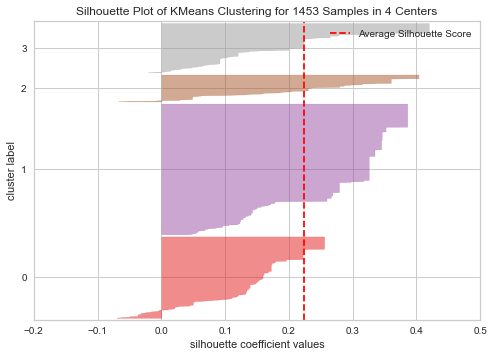

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [32]:
#assign cluster number with there type in PCA
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [33]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,0
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,2
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,2
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,2
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,0


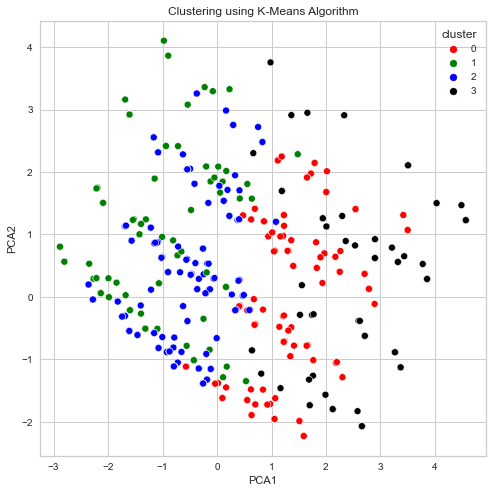

In [34]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [35]:
# Creating a target column "Cluster" for storing the cluster segment
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,2


<AxesSubplot:xlabel='cluster', ylabel='count'>

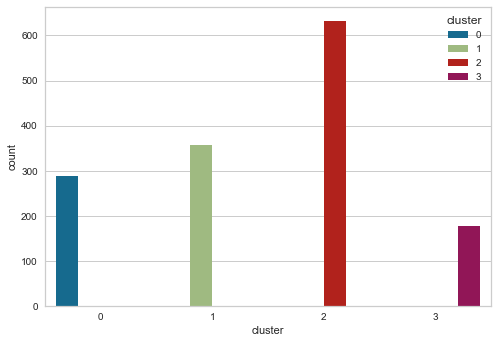

In [36]:
#analysis cluster's
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

# Step 6: Profiling segments 

In [37]:
#grouping with cluster 1
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
6,1,1,1,1,0,1,0,1,1,1,0,0
9,1,1,0,1,1,1,0,1,1,0,0,0
11,1,1,0,1,1,1,0,1,1,0,1,0


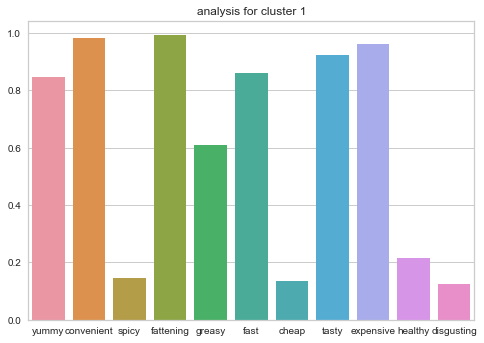

In [38]:
#analysis for cluster 1
ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

## By this analysis, we can say that cluster 1 is (more : yummy, convenient, fattening, greasy, fast, tasty, expensive) and (less : spicy, cheap, healthy, disgusting) 

In [39]:
#grouping with cluster 2

cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
8,0,0,0,1,1,0,0,0,1,0,1,1
10,0,1,0,1,0,1,1,0,0,0,1,1
14,0,1,0,1,0,1,0,0,1,0,0,1
18,0,0,0,1,1,1,1,0,1,0,1,1


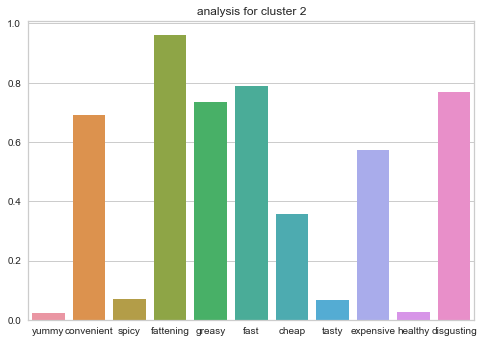

In [40]:
#analysis for cluster 2

ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

## By this analysis, we can say that cluster 2 is (more : convenient, fattening, greasy, fast, expensive, disgusting) and (less : yummy, cheap, spicy, tasty, healthy)

In [41]:
#grouping with cluster 3

cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,2
5,1,1,0,1,0,1,1,1,0,0,0,2
7,1,1,0,1,1,1,1,1,0,0,0,2
12,0,1,0,1,0,1,1,0,0,0,0,2


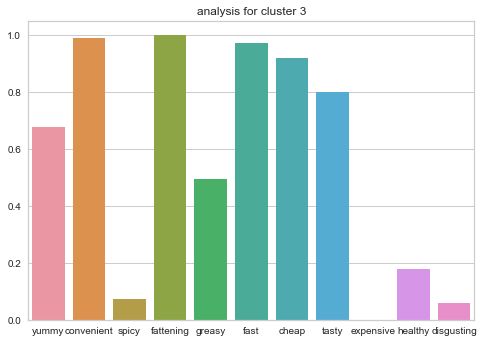

In [42]:
#analysis for cluster 3

ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()

## By this analysis, we can say that cluster 3 is (more : yummy, convenient, fattening, greasy, fast, cheap, tasty) and (less : spicy, expensive, healthy, disgusting)

In [43]:
#grouping with cluster 4

cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
17,1,1,0,0,1,1,0,1,0,0,0,3
28,0,1,0,0,0,1,0,0,0,0,0,3
31,0,1,0,0,0,1,1,1,0,1,0,3
46,0,1,0,0,0,1,0,1,0,1,0,3
54,1,1,0,0,0,1,1,1,0,1,0,3


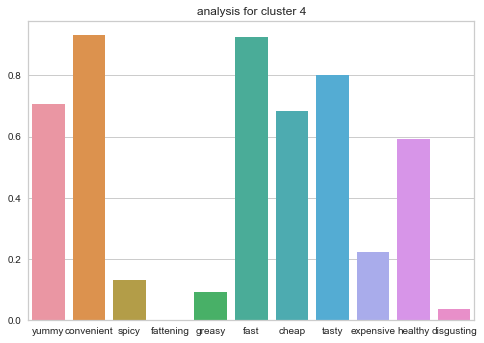

In [44]:
#analysis for cluster 4

ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

## By this analysis, we can say that cluster 4 is (more : yummy, convenient, fast, cheap, tasty, healthy) and (less : spicy, fattening, greasy, expensive, disgusting) 

# Step:7 Describining Segments

In [45]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [46]:
data_new= pd.concat([data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


In [47]:
data_new['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [48]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})


In [49]:
data_new['Like'].value_counts()


+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [50]:
data_new['Gender'].value_counts()


Female    788
Male      665
Name: Gender, dtype: int64

In [51]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})



        Old             New
    I hate it! (-5)      0
        -4               1
        -3               2
        -2               3
        -1               4
         0               5
         1               6
         2               7
         3               8
         4               9
    I love it! (5)       10

In [52]:
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})

## 'Female':0, 'Male':1

In [53]:
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,2


In [54]:
from statsmodels.graphics.mosaicplot import mosaic

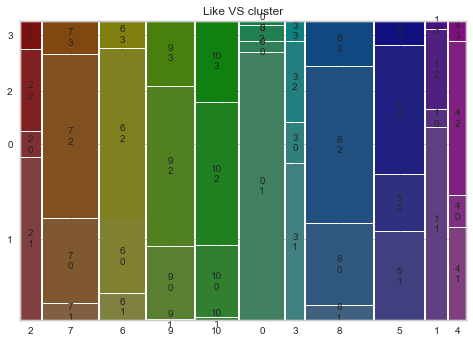

In [55]:
mosaic(data_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

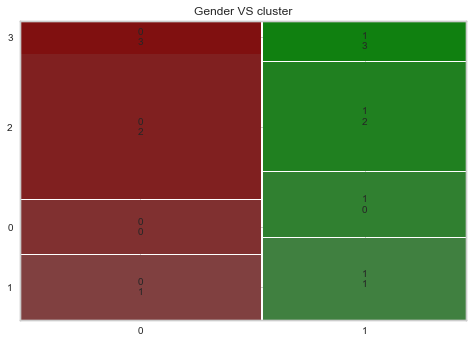

In [58]:
mosaic(data_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

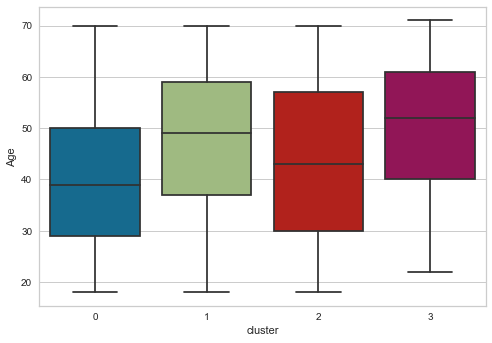

In [59]:
# Visual Python: Visualization > Seaborn
sns.boxplot(x=data_new['cluster'], y=data_new['Age'])
plt.show()

# Step 8: Selecting Target Segments

In [60]:
#Split Dataset
X = data_new.drop(['cluster'],axis=1)
y= data_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [61]:
X_test.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
385,1,1,0,1,1,1,0,1,1,0,0,8,23,4,1
566,0,1,0,1,1,1,1,0,0,0,1,2,46,1,0
331,0,1,0,1,1,1,1,0,0,0,1,1,64,2,1
979,1,1,1,1,1,1,1,1,0,0,0,5,22,3,1
470,1,1,0,0,0,1,1,1,0,0,0,8,27,3,1


In [62]:
y_test.head()

,cluster
385,0
566,1
331,1
979,2
470,3


In [63]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

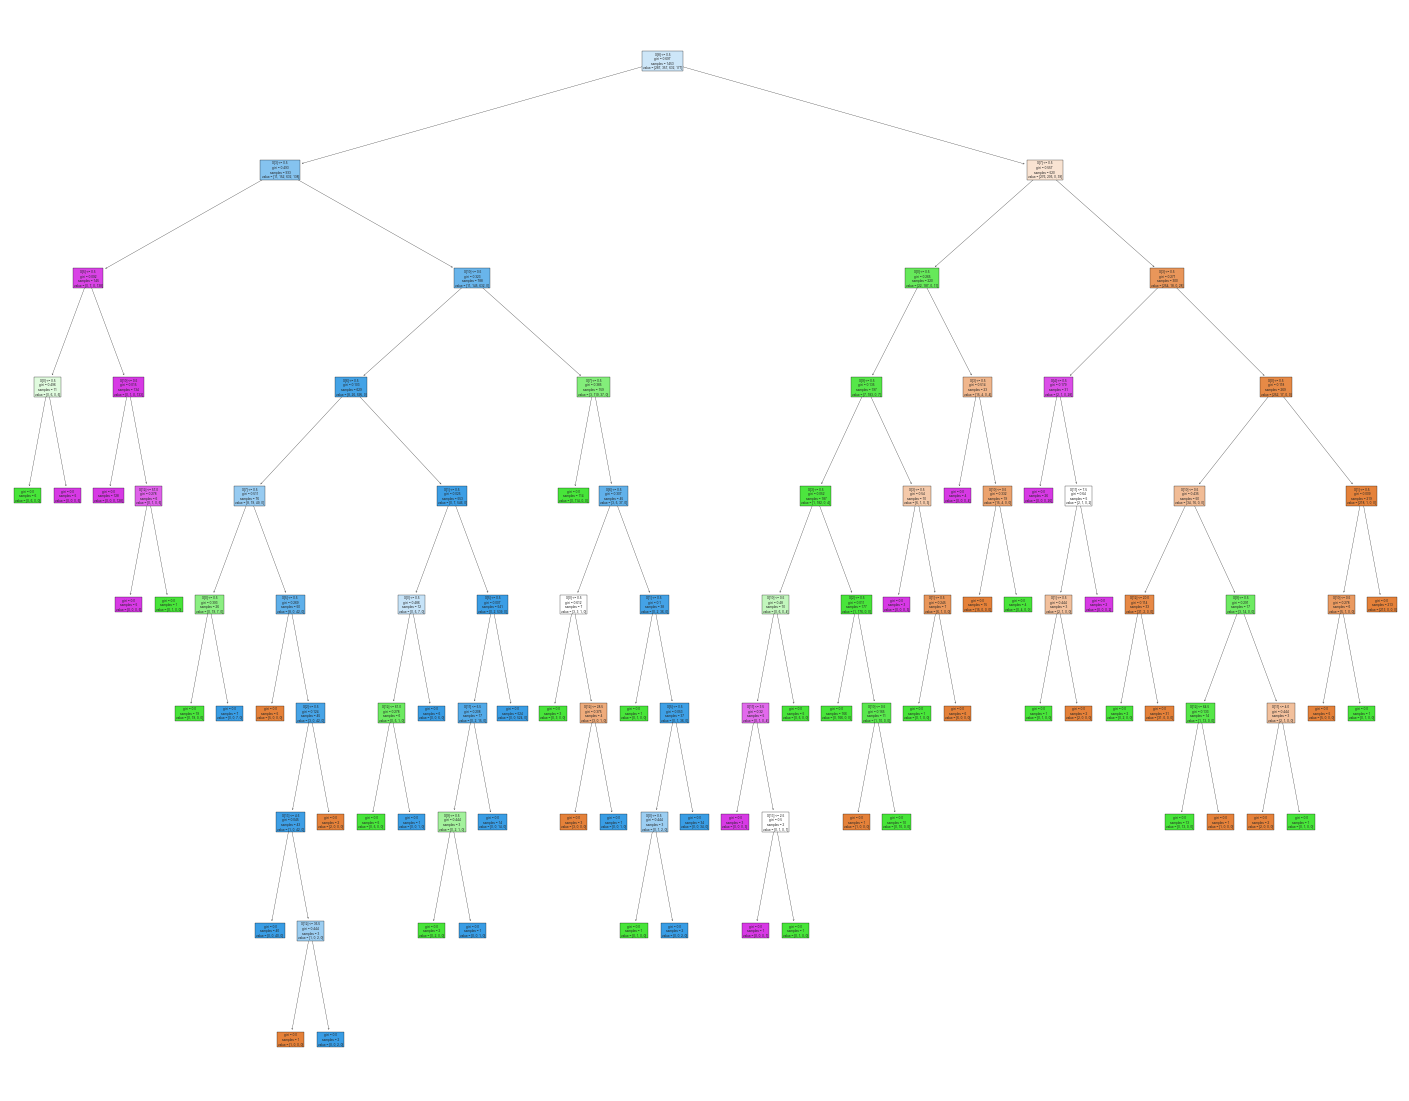

In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

In [65]:
# Visual Python: Visualization > Plotly
fig = px.funnel(x=data_new['VisitFrequency'], y=data_new['Like'], color=data_new['Like'], title='VisitFrequency vs Like', labels={ 'x': 'VisitFrequency', 'y': 'Like' })
fig.show()


        Old labels             New labels
          Never                     0
        Once a year                 1
     Every three months             2
       Once a month                 3
        Once a week                 4
    More than once a week           5

# Step 9 : Customising the marketing mix

In Step 9 the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 1 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 1 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s
range of products. To not cannibalise the main range, the product features of the
MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by
members of segment 1 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same
given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the
queue might be slightly longer in an attempt not to cannibalise the main product line.


# Step 10 :Evaluation and monitoring

In [66]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [67]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 92   1   0   2]
 [  3 102   2   1]
 [  0   0 184   0]
 [  0   1   0  48]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.98      0.94      0.96       108
           2       0.99      1.00      0.99       184
           3       0.94      0.98      0.96        49

    accuracy                           0.98       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.98      0.98      0.98       436



In [68]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9770642201834863 % Acuuracy
